In [43]:
# %pip install pandas
# %pip install numpy
# %pip install seaborn

import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_loaded = pd.read_csv('insurance_data_cleaned.csv')
df= df_loaded
print(df.head())

        age  sex       bmi  children  smoker  region_northwest  \
0 -1.438764    0 -0.454201 -0.908614       1                 0   
1 -1.509965    1  0.515300 -0.078767       0                 0   
2 -0.797954    1  0.388125  1.580926       0                 0   
3 -0.441948    1 -1.312218 -0.908614       0                 1   
4 -0.513149    1 -0.292342 -0.908614       0                 1   

   region_southeast  region_southwest  charges_scaled  
0                 0                 1        0.691394  
1                 1                 0       -1.790020  
2                 1                 0       -0.759500  
3                 0                 0        0.978513  
4                 0                 0       -0.912181  


In [22]:
# X_loaded = df_loaded.drop('charges_scaled', axis=1)

# y_loaded = df_loaded['charges_scaled'].values.reshape(-1, 1)

# X_train, X_test, y_train, y_test = train_test_split(
#     X_loaded, 
#     y_loaded, 
#     test_size=0.20, 
#     random_state=42 
# )

# #  Load the Scaler

# scaler_y = joblib.load('scaler_y.pkl') 

In [25]:
# Split into features and target
X = df.drop("charges_scaled", axis=1)   # replace with your target column
y = df["charges_scaled"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coefficients)

Mean Squared Error: 0.20838015237616575
R² Score: 0.8041908038507755
            Feature  Coefficient
0               age     0.522878
1               sex    -0.080647
2               bmi     0.091648
3          children     0.121124
4            smoker     1.687916
5  region_northwest    -0.061482
6  region_southeast    -0.148804
7  region_southwest    -0.133867


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- charges_scaled
Feature names seen at fit time, yet now missing:
- age
- bmi
- children
- region_northwest
- region_southeast
- ...


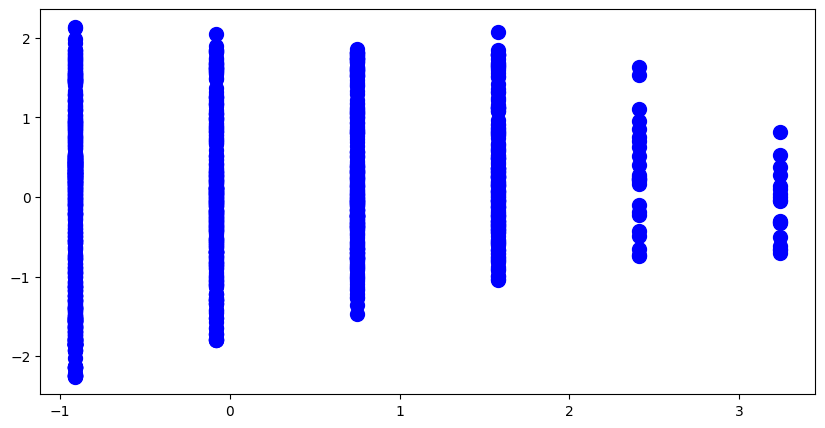

In [ ]:

# plt.figure(figsize=(12, 8))
# df.hist(bins=30, figsize=(12, 8), edgecolor="black")
# plt.tight_layout()
# plt.show()

# sns.pairplot(df)
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), annot=True, cmap="viridis")
# plt.title("Correlation Heatmap")
# plt.show()

# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df)
# plt.title("Boxplot for All Features")
# plt.show()

#######
# plt.figure(figsize=(10,5)) 
# plt.scatter(df['children'],df['charges_scaled'], color="blue", label="Actual data", s=100) 
# plt.plot(df['charges_scaled'], model.predict(df[['charges_scaled']]), color='red', label="Regresion Line")
# plt.xlabel("charges_scaled") 
# plt.ylabel("Winning Time (seconds)") 
# plt.title("Olympic 100m Gold Medal Times With Regression Line") 
# plt.legend() 
# plt.show()
